# Dominik Strzałko - Zadanie 7 - Reprezentacja danych

# **0.** Pobranie zbioru i import bibliotek

---



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
df =pd.read_csv('flats.tsv', sep='\t')

In [3]:
df.head()

,cena,Powierzchnia w m2,Liczba pokoi,Miejsce parkingowe,Liczba pięter w budynku,Piętro,Typ zabudowy,Okna,Materiał budynku,Rok budowy,Forma własności,Forma kuchni,Stan,Stan instalacji,Głośność,Droga dojazdowa,Stan łazienki,Powierzchnia działki w m2,opis
0,290386,46,2,brak miejsca parkingowego,5.0,parter,apartamentowiec,plastikowe/PCV,cegła,2017.0,własność,w aneksie,stan deweloperski,nowa,NaN,NaN,NaN,NaN,"Polecam mieszkanie 2 pokojowe o metrażu 46,68..."
1,450000,59,2,brak miejsca parkingowego,3.0,2,kamienica,plastikowe/PCV,cegła,1902.0,własność,w aneksie,NaN,NaN,NaN,NaN,NaN,NaN,Ekskluzywna oferta - tylko u nas! Projekt arc...
2,375000,79,3,brak miejsca parkingowego,16.0,5,blok,NaN,płyta,1990.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Polecam do kupna przestronne mieszkanie trzyp...
3,400000,63,3,w garażu,2.0,2,blok,plastikowe/PCV,cegła,2009.0,własność,odzielna,NaN,NaN,ciche,NaN,bardzo dobry,NaN,Dla rodziny albo pod wynajem. Świetna lokaliz...
4,389285,59,3,brak miejsca parkingowego,13.0,12,blok,NaN,NaN,NaN,NaN,w aneksie,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **1.** Badanie zbioru i zamiana danych na numeryczne

---

### **1.1.** Miejsca parkingowe (Kategoryczne na numeryczne)

In [4]:
df['Miejsce parkingowe'].unique()

array([' brak miejsca parkingowego', ' w garażu', ' przynależne na ulicy',
       ' parking strzeżony', ' pod wiatą'], dtype=object)

In [5]:
parking_dic = {
    " brak miejsca parkingowego":0,
    " przynależne na ulicy":1,
    " parking strzeżony":2,
    " pod wiatą":3,
    " w garażu":4,
}

In [6]:
df['Miejsce parkingowe'] = df['Miejsce parkingowe'].map(parking_dic)  

In [7]:
df['Miejsce parkingowe'].unique()

array([0, 4, 1, 2, 3])

In [8]:
df['Miejsce parkingowe'].head()

0    0
1    0
2    0
3    4
4    0
Name: Miejsce parkingowe, dtype: int64

<Figure size 1440x432 with 0 Axes>

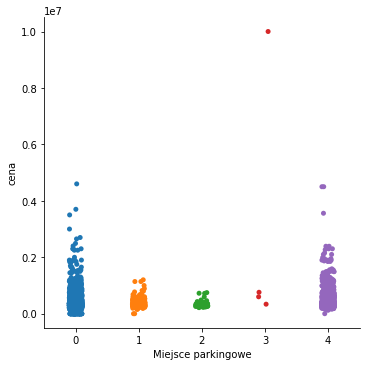

In [9]:
plt.figure(figsize=(20,6))
sns.catplot(x='Miejsce parkingowe',y='cena', data=df)
plt.show()

### **1.2.** Piętro (częściowo numeryczne na numeryczne)

In [10]:
df['Piętro'].unique()

array([' parter', ' 2', ' 5', ' 12', ' 1', ' 3', nan, ' 8', ' 4', ' 16',
       ' 7', ' 6', ' poddasze', ' 9', ' 11', ' 13', ' 14', ' 10', ' 15',
       ' niski parter'], dtype=object)

In [11]:
df['Piętro'] = df['Piętro'].apply(lambda x: 0 if x in [' parter', ' niski parter'] else x)

In [12]:
df.drop(df[df['Piętro'] == ' poddasze'].index, inplace=True)

In [13]:
df['Piętro'] = df['Piętro'].apply(pd.to_numeric, errors='coerce')

In [14]:
df['Piętro'].unique()

array([ 0.,  2.,  5., 12.,  1.,  3., nan,  8.,  4., 16.,  7.,  6.,  9.,
       11., 13., 14., 10., 15.])

In [15]:
df['Piętro'].value_counts()

1.0     897
0.0     834
2.0     719
3.0     669
4.0     549
5.0     260
7.0      78
8.0      63
9.0      59
6.0      55
11.0     39
12.0     35
10.0     32
14.0     25
13.0     25
16.0     11
15.0      4
Name: Piętro, dtype: int64

<Figure size 3600x3600 with 0 Axes>

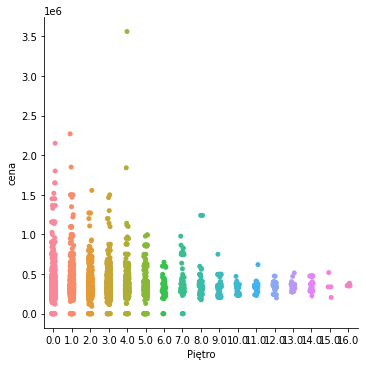

In [16]:
plt.figure(figsize=(50,50))
sns.catplot(x='Piętro',y='cena', data=df)
plt.show()

### **1.3.** Materiał budynku (Kategotyczny na numeryczne)

In [17]:
df['Materiał budynku'].unique()

array([' cegła', ' płyta', nan, ' silikat', ' pustak', ' inne', ' beton',
       ' drewno', ' kamień'], dtype=object)

In [18]:
material_dic = {
    " cegła":0,
    " płyta":1,
    " silikat":2,
    " pustak":3,
    " inne":4,
    " beton":5,
    " drewno":6,
    " kamień":7
    #8 to nan
}

In [19]:
df['Materiał budynku'] = df['Materiał budynku'].map(material_dic)  

In [20]:
df['Materiał budynku'] = df['Materiał budynku'].apply(lambda x: 8 if pd.isnull(x) else x)

<Figure size 1440x432 with 0 Axes>

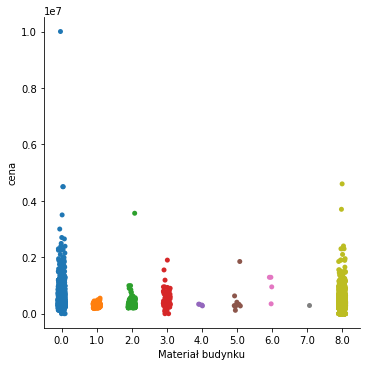

In [21]:
plt.figure(figsize=(20,6))
sns.catplot(x='Materiał budynku',y='cena', data=df )
plt.show()

### **1.4.** Heatmap

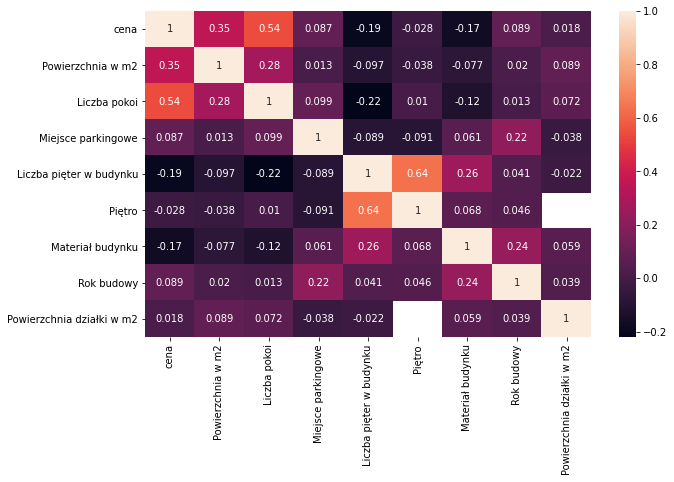

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

# **2.** Model v.1 (Przed poprawą)

---

### **2.1** Train/Test

In [23]:
model_df = df.loc[:, ['cena', 'Powierzchnia w m2', 'Liczba pokoi', 'Miejsce parkingowe', 'Liczba pięter w budynku', 'Piętro', 'Materiał budynku']]
model_df = model_df.dropna()

model_df["cena"]=((model_df["cena"]-model_df["cena"].min())/(model_df["cena"].max()-model_df["cena"].min()))*100

y = model_df.cena
x = model_df.loc[:, ['Powierzchnia w m2', 'Liczba pokoi', 'Miejsce parkingowe', 'Liczba pięter w budynku', 'Piętro', 'Materiał budynku']]

x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.2,train_size=0.8, random_state=5)

In [24]:
x

,Powierzchnia w m2,Liczba pokoi,Miejsce parkingowe,Liczba pięter w budynku,Piętro,Materiał budynku
0,46,2,0,5.0,0.0,0.0
1,59,2,0,3.0,2.0,0.0
2,79,3,0,16.0,5.0,1.0
3,63,3,4,2.0,2.0,0.0
4,59,3,0,13.0,12.0,8.0
...,...,...,...,...,...,...
4932,73,3,4,3.0,2.0,0.0
4933,97,4,0,4.0,4.0,8.0
4934,48,2,4,4.0,3.0,8.0
4935,67,3,4,2.0,0.0,8.0


### **2.2** Trening i Score

In [25]:
linReg = LinearRegression()
linReg.fit(x_train, y_train)

score = linReg.score(x_test, y_test)
print(score)

0.6086811135557098


### **2.3.** Predykcje a realne wyniki

In [26]:
y_pred = linReg.predict(x_test)

In [27]:
test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) #Porównanie wartości prawidłowych z przewidzianymi
test_df

,Actual,Predicted
171,11.798664,14.644920
3654,9.410839,7.178426
2560,12.167625,13.056079
691,6.996271,6.584548
4866,9.804128,9.451019
...,...,...
424,8.422336,10.414732
557,24.292972,14.473285
4552,7.706887,9.492327
3730,20.563386,12.782577


### **2.4.** MSE

In [28]:
mn = mean_squared_error(y_test, y_pred)
print(mn)

8.650050250399445


# **3.** Model v.2 (Usunięcie odstających danych)

---

### **3.1.** Usunięcie danych odstających

In [29]:
df.drop(df[df['Materiał budynku'] == 4].index, inplace=True)
df.drop(df[df['Materiał budynku'] == 6].index, inplace=True)
df.drop(df[df['Materiał budynku'] == 7].index, inplace=True)
df.drop(df[df['Miejsce parkingowe'] == 3].index, inplace=True)

### **3.2.** Badanie powierzchni i ceny 

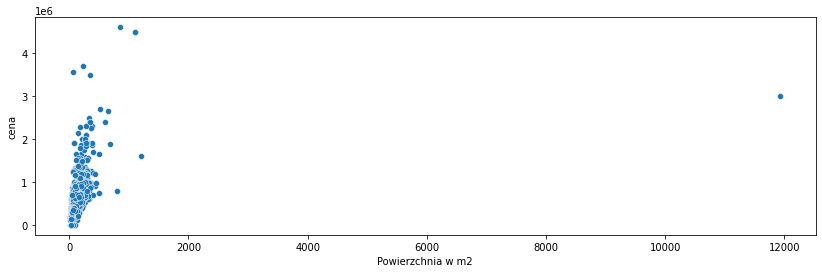

In [30]:
plt.figure(figsize=(14,4))
sns.scatterplot(x=df['Powierzchnia w m2'], y=df['cena']);

In [33]:
df[df['Powierzchnia w m2']>=750]

,cena,Powierzchnia w m2,Liczba pokoi,Miejsce parkingowe,Liczba pięter w budynku,Piętro,Typ zabudowy,Okna,Materiał budynku,Rok budowy,Forma własności,Forma kuchni,Stan,Stan instalacji,Głośność,Droga dojazdowa,Stan łazienki,Powierzchnia działki w m2,opis
840,1600000,1200,6,0,3.0,NaN,NaN,NaN,0.0,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1200.0,Do sprzedaży luksusowy dom położony w Szczepa...
1123,4600000,855,5,0,2.0,NaN,NaN,NaN,8.0,1950.0,NaN,NaN,NaN,NaN,NaN,asfaltowa,NaN,855.0,Do sprzedaży dom wolnostojacy o pow. całkowit...
2192,4500000,1100,6,4,1.0,NaN,NaN,NaN,0.0,2002.0,NaN,NaN,NaN,NaN,NaN,asfaltowa,NaN,6325.0,| Reprezentacyjna rezydencja o pow. blisko 1...
2680,4499999,1100,6,4,1.0,NaN,NaN,NaN,0.0,2002.0,NaN,NaN,NaN,NaN,NaN,utwardzana,NaN,6300.0,Oferujemy do sprzedaży reprezentacyjną rezyde...
3113,3000000,11930,4,0,3.0,NaN,NaN,NaN,0.0,2001.0,NaN,NaN,NaN,NaN,NaN,utwardzana,NaN,11930.0,W naszej ofercie nietypowa nieruchomość na sk...
4085,798000,800,7,0,2.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300000.0,W ofercie sprzedaży dworek/pałacyk w Wielkopo...


In [34]:
df.drop(df[df['Powierzchnia w m2'] >=750].index, inplace=True)

In [35]:
df[df['cena']>=2500000]

,cena,Powierzchnia w m2,Liczba pokoi,Miejsce parkingowe,Liczba pięter w budynku,Piętro,Typ zabudowy,Okna,Materiał budynku,Rok budowy,Forma własności,Forma kuchni,Stan,Stan instalacji,Głośność,Droga dojazdowa,Stan łazienki,Powierzchnia działki w m2,opis
650,3700000,240,7,0,2.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,do remontu,NaN,NaN,NaN,NaN,740.0,| Na sprzedaż dom z cegły z 1933 r. wraz z d...
813,2700000,510,1,0,4.0,NaN,NaN,NaN,0.0,1900.0,NaN,NaN,NaN,NaN,NaN,utwardzana,NaN,510.0,Historyczna kamienica przy Starym Rynku z wid...
1416,3559725,60,3,4,4.0,4.0,blok,plastikowe/PCV,2.0,NaN,własność,w aneksie,NaN,NaN,NaN,NaN,NaN,NaN,Kontynuacja rozbudowy poznańskiego osiedla Re...
1940,3500000,346,4,0,2.0,NaN,NaN,NaN,0.0,2002.0,NaN,NaN,NaN,NaN,NaN,asfaltowa,NaN,1660.0,OBIEKT HANDLOWY + DOMLUB DZIAŁKA POD BIUROWIE...
4231,2650000,650,8,0,2.0,NaN,NaN,NaN,0.0,2010.0,NaN,NaN,NaN,NaN,NaN,asfaltowa,NaN,2600.0,Polecam na sprzedaż wyjątkową nieruchomość po...


In [36]:
df.drop(df[df['cena']>=2500000].index, inplace=True)

In [37]:
df[df['cena']<=10000]

,cena,Powierzchnia w m2,Liczba pokoi,Miejsce parkingowe,Liczba pięter w budynku,Piętro,Typ zabudowy,Okna,Materiał budynku,Rok budowy,Forma własności,Forma kuchni,Stan,Stan instalacji,Głośność,Droga dojazdowa,Stan łazienki,Powierzchnia działki w m2,opis
21,0,33,2,0,5.0,5.0,blok,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,0,36,2,0,5.0,0.0,blok,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,0,55,2,0,7.0,1.0,apartamentowiec,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,0,53,2,0,7.0,5.0,apartamentowiec,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,0,54,3,0,7.0,6.0,blok,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4696,0,33,2,0,5.0,2.0,blok,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4718,0,63,3,0,5.0,3.0,blok,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4728,0,69,3,0,5.0,5.0,blok,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4796,0,35,2,0,5.0,4.0,blok,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df.drop(df[df['cena']<=10000].index, inplace=True)

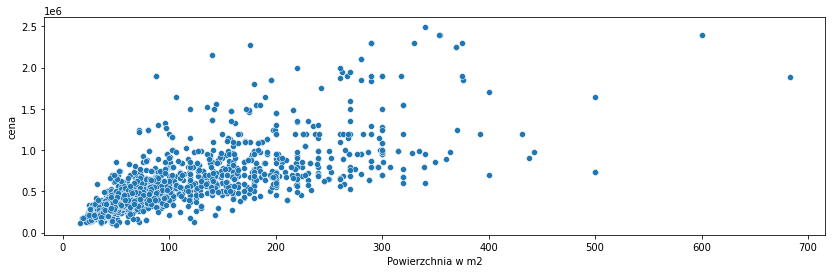

In [39]:
plt.figure(figsize=(14,4))
sns.scatterplot(x=df['Powierzchnia w m2'], y=df['cena']);

### **3.3.**  Nowy model

In [99]:
model_df = df.loc[:, ['cena', 'Powierzchnia w m2', 'Liczba pokoi', 'Miejsce parkingowe', 'Liczba pięter w budynku', 'Piętro', 'Materiał budynku']]
model_df = model_df.dropna()

model_df["cena"]=((model_df["cena"]-model_df["cena"].min())/(model_df["cena"].max()-model_df["cena"].min()))*100

y = model_df.cena
x = model_df.loc[:, ['Powierzchnia w m2', 'Liczba pokoi', 'Miejsce parkingowe', 'Liczba pięter w budynku', 'Piętro', 'Materiał budynku']]

x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.2,train_size=0.8, random_state=5)

In [100]:
linReg_v2 = LinearRegression()
linReg_v2.fit(x_train, y_train)

score = linReg_v2.score(x_test, y_test)
print(score)

0.6908405153871318


In [101]:
y_pred = linReg_v2.predict(x_test)
mn = mean_squared_error(y_test, y_pred)
print(mn)

19.74259939174266


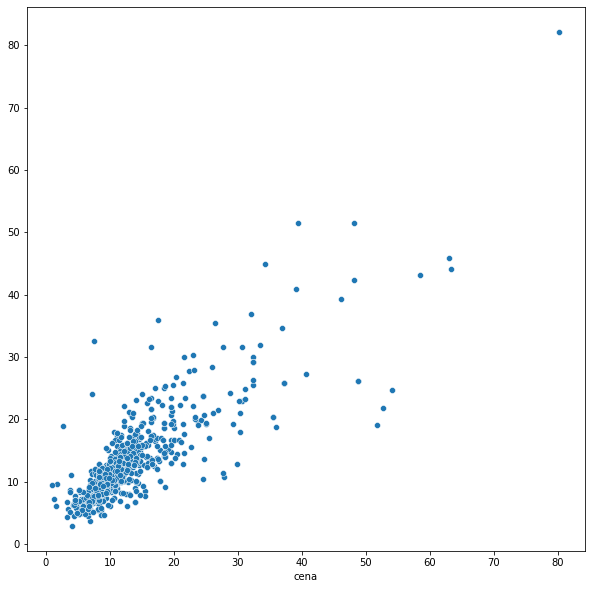

In [102]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test, y=y_pred);

# **4.** Model v.3 (podział Typu zabudowy)

---

In [103]:
model_df = df.loc[:, ['cena', 'Powierzchnia w m2', 'Liczba pokoi', 'Miejsce parkingowe', 'Liczba pięter w budynku', 'Piętro', 'Materiał budynku', 'Typ zabudowy']]
model_df = model_df.dropna()

model_df["cena"]=((model_df["cena"]-model_df["cena"].min())/(model_df["cena"].max()-model_df["cena"].min()))*100
model_df = pd.get_dummies(model_df, columns=['Typ zabudowy']) #Podział typu zabudowy na osobne kolumny

y = model_df.cena
x = model_df.drop('cena', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.2,train_size=0.8, random_state=5)

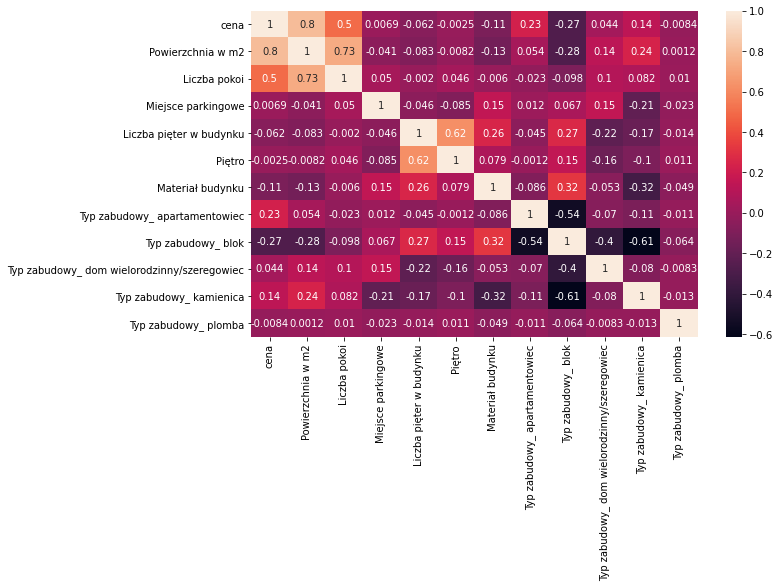

In [104]:
plt.figure(figsize=(10,6))
sns.heatmap(model_df.corr(),annot=True)
plt.show()

In [105]:
linReg_v3 = LinearRegression()
linReg_v3.fit(x_train, y_train)

score = linReg_v3.score(x_test, y_test)
print(score)

0.6638364485184243


In [106]:
y_pred = linReg_v3.predict(x_test)
mn = mean_squared_error(y_test, y_pred)
print(mn)

16.052354723915634


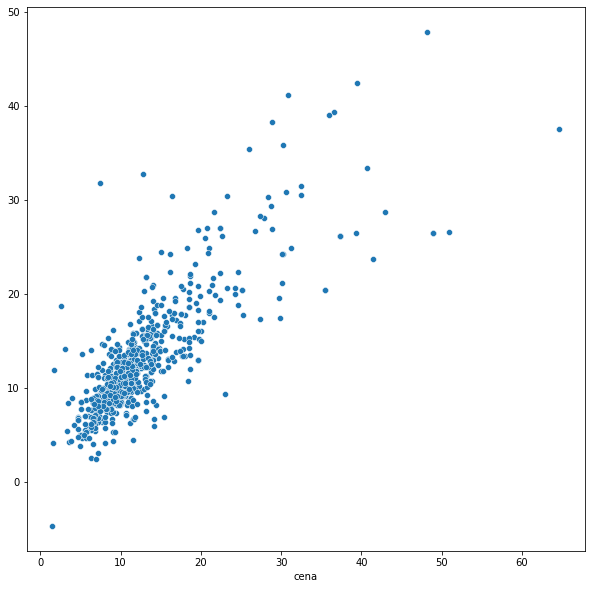

In [107]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test, y=y_pred);

# **5.** Wnioski i porównanie wyników z 3 klasyfikatorów

---


We Wszystkich 3 modelach została wykorzystana regresja liniowa wielu zmiennych

---

W **Pierwszym** modelu uzyskaliśmy: 

**Score: 0.6086811135557096** 

**MSE: 8.650050250399445**. 

Był to model, w którym przeprowadziliśmy normalizację ceny do wartości z przedziału 0-100 oraz zamieniliśmy na wartości numeryczne kolumny odpowiadające za *'Miejsce Parkingowe'*, *'Materiał budynku'* oraz *'Piętro'*.

---

W **Drugim** modelu uzyskaliśmy: 

**Score: 0.6908405153871318**

**MSE: 19.74259939174266**. 

Był to model, w którym zostały zastosowane te same zmiany co w 1 modelu, oraz została usunięta spora część wartości odstających (w szczególności z kolumny 'cena'). Uzyskane zostało dzięki temu podniesienie wartości **Score** o 13.5% względem poprzedniej wartości!

---

W **Trzecim** modelu uzyskaliśmy: 

**Score: 0.6638364485184243**

**MSE: 16.052354723915634**. 

Był to model, w którym zostały zastosowane zmiany 1 i 2 modelu, oraz zostały dodane nowe kolumny zależne od Typu zabudowy. Wynik jest lepsy niż w modelu 1 lecz gorszy niż w modelu 2. 

---



Na 100% możemy powiedzieć, że preprocesing danych dodaje naszemu modelowi większe prawdopodobieństwo prawdziwych predykcji. A co do ilości zmiennych, które wpływają na wynik, to zależy od danego parametru. niektóre z nich mają bardzo niską korelację z resztą zmiennych.

Ciężko też to oceniać bez przeprowadzenia jeszcze większej liczby eksperymentów i badania tych zmian wraz ze zmianą zbiorów test/train.